In [1]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data

df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
x=df.drop('sales',axis=1)
y=df['sales']

In [4]:
train_rmse_score=[]
test_rmse_score=[]

from sklearn.preprocessing import PolynomialFeatures

for i in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=i)
    polynomial_features=polynomial_converter.fit_transform(x)
    
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(polynomial_features,y,test_size=0.3,random_state=101)
    
    from sklearn.linear_model import LinearRegression
    
    model=LinearRegression()
    model.fit(x_train,y_train)
    
    test_pred=model.predict(x_test)
    train_pred=model.predict(x_train)
    
    from sklearn.metrics import mean_squared_error
    
    train_rmse_score.append(np.sqrt(mean_squared_error(y_train,train_pred)))
    test_rmse_score.append(np.sqrt(mean_squared_error(y_test,test_pred)))

[]

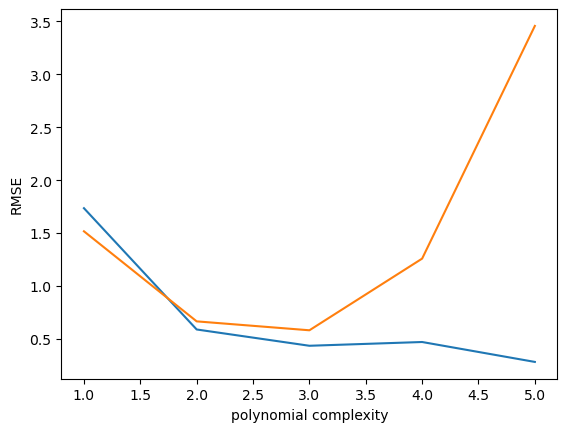

In [5]:
plt.plot(range(1,6),train_rmse_score[:5],label='Train')
plt.plot(range(1,6),test_rmse_score[:5],label='Test')
plt.xlabel('polynomial complexity')
plt.ylabel('RMSE')
plt.plot()

In [6]:
# degree = 3 is better from the above graph

In [7]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=3)
polynomial_features=polynomial_converter.fit_transform(x)

In [8]:
x.shape

(200, 3)

In [9]:
polynomial_features.shape

(200, 20)

In [10]:
# training and testing the data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(polynomial_features,y,test_size=0.3,random_state=101)

In [11]:
x_train.shape

(140, 20)

In [12]:
x_test.shape

(60, 20)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [14]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
x_train.shape

(140, 20)

In [16]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
test_pred=model.predict(x_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE=mean_absolute_error(y_test,test_pred)
MSE=mean_squared_error(y_test,test_pred)
RMSE=np.sqrt(MSE)

In [19]:
MAE

0.4127516085297495

In [20]:
MSE

0.33678137975071015

In [21]:
RMSE

0.5803286825159603

In [22]:
train_pred=model.predict(x_train)

In [23]:
MAE=mean_absolute_error(y_train,train_pred)
MSE=mean_squared_error(y_train,train_pred)
RMSE=np.sqrt(MSE)

In [24]:
MAE

0.2910969680594909

In [25]:
MSE

0.18829909447777796

In [26]:
RMSE

0.4339344356902065

In [27]:
from sklearn.metrics import r2_score

r2_score(y_test,test_pred)

0.9880710036582334

In [28]:
r2_score(y_train,train_pred)

0.9928447338242365